In [14]:
import pybrain
import numpy as np
from pybrain.tools.validation import ModuleValidator
from pybrain.structure import TanhLayer, LinearLayer, SigmoidLayer, SoftmaxLayer
from pybrain.datasets import ClassificationDataSet, SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure import FullConnection
from pybrain.structure import FeedForwardNetwork
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
def build_my_net(i,h,o):
    inLayer = LinearLayer(i)
    hiddenLayer = TanhLayer(h)
    outLayer = LinearLayer(o)
    
    net = FeedForwardNetwork()
    net.addInputModule(inLayer)
    net.addModule(hiddenLayer)
    net.addOutputModule(outLayer)
    
    in_to_hidden = FullConnection(inLayer, hiddenLayer)
    hidden_to_out = FullConnection(hiddenLayer, outLayer)
    net.addConnection(in_to_hidden)
    net.addConnection(hidden_to_out)
    
    net.sortModules()
    return net

In [11]:
def buildFuncDataSet(x_data, y_data):
    data = SupervisedDataSet(1, 1)
    for i in range(len(x_data)):
        data.addSample(x_data[i], y_data[i])
    return data

In [12]:
#2
def x3(x):
    return x**3

set1x = np.random.uniform(-3,2,2000)
set2x = np.random.uniform(-3,2,1000)
set3x = np.random.uniform(-3,3,1000)

set1y = np.apply_along_axis(x3, 0, set1x)
set2y = np.apply_along_axis(x3, 0, set2x)
set3y = np.apply_along_axis(x3, 0, set3x)

set1 = buildFuncDataSet(set1x, set1y)
set2 = buildFuncDataSet(set2x, set2y)
set3 = buildFuncDataSet(set3x, set3y)

In [13]:
X1 = list(range(1,100,10))
Y1 = []
for i in X1:
    network = build_my_net(1,i,1)
    trainer = BackpropTrainer(network, set1, weightdecay=0.00001)
    trainer.trainEpochs(100)
    Y1.append(ModuleValidator.MSE(trainer.module, set1))

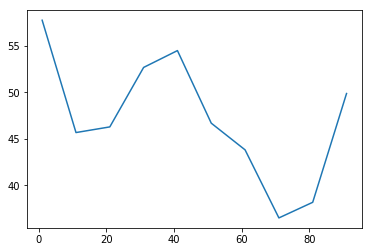

In [15]:
plt.plot(X1, Y1)

In [16]:
X2 = list(range(1,100,10))
Y2 = []
for i in X2:
    network = build_my_net(1,i,1)
    trainer = BackpropTrainer(network, set2, weightdecay=0.00001)
    trainer.trainEpochs(100)
    Y2.append(ModuleValidator.MSE(trainer.module, set2))

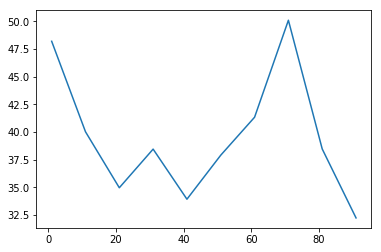

In [17]:
plt.plot(X2, Y2)

In [ ]:
for i in [1,5,10,20,50,100,200]:
    network = build_my_net(1,i,1)
    trainer = BackpropTrainer(network, set3, weightdecay=0.00001)
    trainer.trainEpochs(100)
    print(ModuleValidator.MSE(trainer.module, set3))

In [5]:
dataset = ClassificationDataSet.loadFromFile('/Users/kondranton/Desktop/pybrain/mnist_train')

UnicodeDecodeError: 'ascii' codec can't decode byte 0x88 in position 1222: ordinal not in range(128)